# Decision Tree


A decision tree splits data step by step to decide which group( class ) an element belongs to. Each split is based on feature that seperates the group the best.

## Key Concepts
#### Entropy:
This measures the "messiness" of a group. Lower messiness means the group is similar.
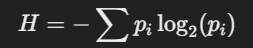

 pi:
The proportion of item in group i. For example, if 4 out of 10 are "yes", p is 0.4 for yes.

#### Information Gain: This tells us how much better we got at seperating the data after a split 

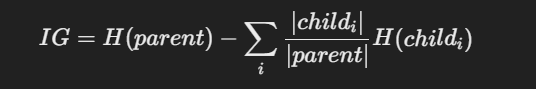


#### Gini Index:
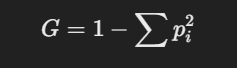

In [ ]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np 

class DecisionTreeClassifier:
    def __init__(self, max_depth=10):
        self.max_depth= max_depth
        self.tree = None 

    def fit (self, X,y):
        self.tree = self._build_tree(X, y)

    def predict(self, X):
        return np.array([self._predict(x, self.tree) for x in X])

    def _build_tree(self, X, y, depth = 0 ):
        # stop criteria 
        if depth >= self.max_depth or len(set(y)) == 1:
            return {'value': self._most_common_label(y)}

        #find the best split 
        feature, threshold = self._best_split(X, y)
        if feature is None:
            return {'value': self._most_common_label(y)}

        # Split dataset
        left_indices = X[:, feature] <= threshold 
        right_indices = X[:, feature] > threshold 
        left_child = self._build_tree(X[left_indices], y[left_indices], depth+1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature': feature, 'threshold': threshold, 'left': left_child, 'right': right_child}
    
    def _best_split(self, X,y):
        best_gain = -1 
        best_feature, best_threshold = None, None
        current_entropy = self._entropy(y)

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                left_entropy = self._entropy(y[left_indices])
                right_entropy = self._entropy(y[right_indices])
                left_weight = len(y[left_indices]) / len(y)
                right_weight = len(y[right_indices]) / len(y)
                gain = current_entropy - (left_weight * left_entropy + right_weight * right_entropy)

                if gain > best_gain:
                    best_gain = gain 
                    best_feature = feature 
                    best_threshold = threshold 
        return best_feature, best_threshold 
    
    def _entropy(self, y):
        probabilities = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in probabilities if p>0])
    
    def _most_common_label(self, y):
        return np.bincount(y).argmax()
    
    def _predict(self, x, tree):
        if 'value' in tree:
            return tree['value']
        feature, threshold = tree['feature'], tree['threshold']
        if x[feature] <= threshold:
            return self._predict(x, tree['left'])
        else:
            return self._predict(x, tree['right'])
    

In [ ]:
data = load_iris()
X, y= data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Acurracy: {accuracy:.2f}")